In [1]:
import matplotlib.pyplot as plt
import numpy as np 

# Verlet's Method: simple pendulum

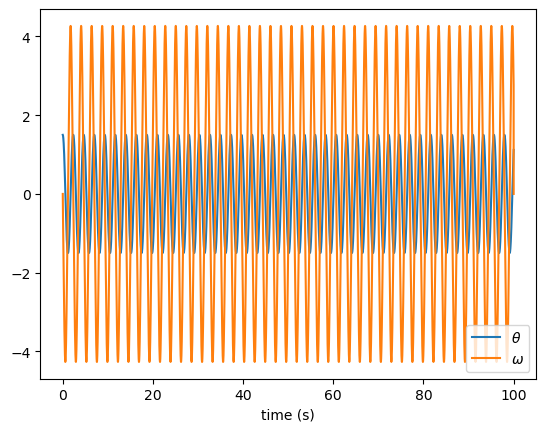

In [45]:
def acc(theta,g,L):
    return -g/L*np.sin(theta)

h = 0.01
N_steps = 10000
g = 9.8
L = 1

time = np.zeros(N_steps+2)
theta = np.zeros(N_steps+2)

omega = np.zeros(N_steps+2)
E = np.zeros(N_steps+2)


theta[1] = 1.5
omega[1] = 0
theta[0] = theta[1] - 0.5*h*h*acc(theta[1],g,L)

E[1] = 0.5*L**2*omega[1] + g*L*g*(1-np.cos(theta[1]))

for t in range(2,N_steps+2):
    time[t] = time[t-1] + h
    theta[t] = 2*theta[t-1] - theta[t-2]+ h*h*acc(theta[t-1], g, L)

for t in range(2,N_steps+1):
    omega[t] = (theta[t+1] - theta[t-1]) / (2*h)
    E[t] = 0.5*L*L*omega[t]**2 + g * L * (1-np.cos(theta[t]))
    

    
    
plt.plot(time,theta,label=r'$\theta$')
plt.plot(time,omega,label=r'$\omega$')
plt.xlabel('time (s)')

plt.legend()
plt.show()

plt.plot(theta,omega,lw=0.9)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
# plt.plot(time,omega,label=r'$\omega$')
plt.show()

plt.plot(time,E,label=r'$E$ (total energy)')
# plt.plot(time,omega,label=r'$\omega$')
plt.legend()
plt.show()
    

    

/var/folders/j9/6bbx4y9507q6m64lhqtly8tc0000gn/T/ipykernel_28529/3542859037.py:21: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(x[i], y[i])  # Dot at the end of the line


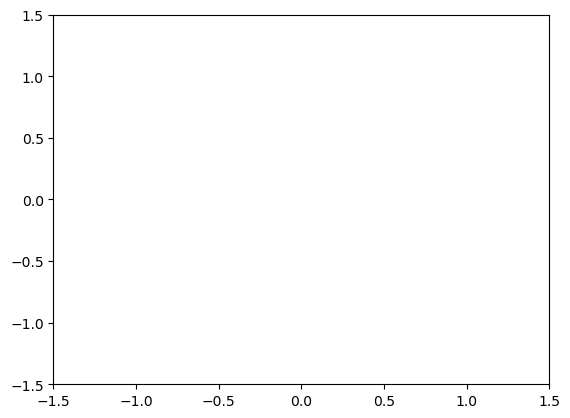

In [46]:
from matplotlib.animation import FuncAnimation
y = -L*np.cos(theta)
x = -L*np.sin(theta)

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)  # Set x-axis limits
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], '-', color='black', lw=2)  # Line from pivot to the pendulum
dot, = ax.plot([], [], 'o', color='blue', markersize=8)  # Dot at the end of the line

# Initialization function
def init():
    line.set_data([], [])
    dot.set_data([], [])
    return line, dot

# Animation function
def animate(i):
    # Update the line and dot position
    line.set_data([0, x[i]], [0, y[i]])  # Line from pivot (0, 0) to (x[i], y[i])
    dot.set_data(x[i], y[i])  # Dot at the end of the line
    return line, dot

ani = FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0,2000,15), interval=30, blit=False
)
from IPython.display import HTML
HTML(ani.to_jshtml())

# Verlet's method: Anharmonic oscillator

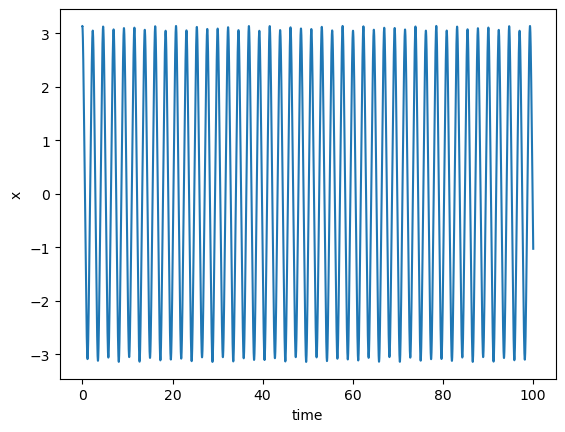

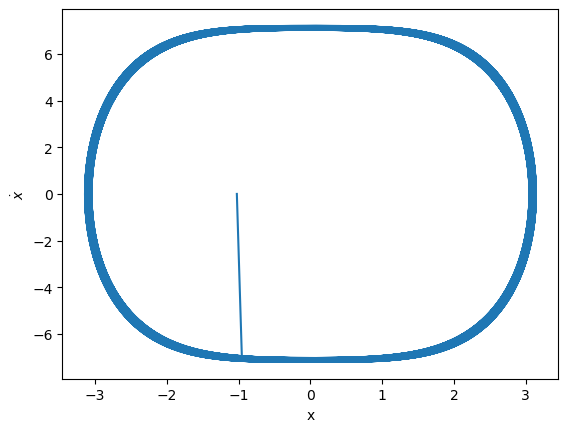

In [34]:
x = np.zeros(N_steps+2)
xdot = np.zeros(N_steps+2)
time = np.zeros(N_steps+2)

beta=1
omega = 1.2
gamma = 0.37
alpha=0.5

def acc_aosc(x,t,alpha,beta,gamma,omega):
    return -alpha*x - beta*x**3 + gamma*np.cos(omega*t)

x[1] = np.pi
xdot[1] = 0
x[0] = x[1] - h*xdot[1] + 0.5*h*h*acc_aosc(x[1],time[1],alpha,beta,gamma,omega)

for t in range(2,N_steps+2):
    time[t] = time[t-1] + h
    x[t] = 2*x[t-1] - x[t-2] + h*h*acc_aosc(x[t-1],time[t-1],alpha,beta,gamma,omega)
    
for t in range(2,N_steps+1):
    xdot[t] = (x[t+1] - x[t-1]) / (2*h)
    
plt.plot(time,x)
plt.xlabel('time')
plt.ylabel('x')

plt.show()

plt.plot(x,xdot)
plt.xlabel('x')
plt.ylabel(r'$\dot{x}$')
plt.show()

# Homework: Double-Pendulum

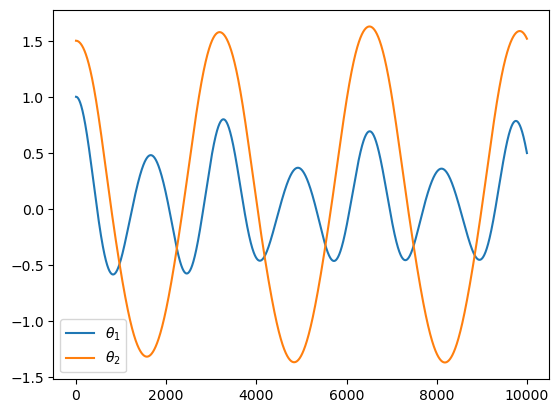

In [54]:

def verlet(f1,f2,t1,t2,w1,w2,dt,n):
    
    l=1
    g=9.8
    th1,th2,omega1,omega2=np.zeros(n),np.zeros(n),np.zeros(n),np.zeros(n)
    th1[0],th2[0],omega1[0],omega2[0]=t1,t2,w1,w2
    for i in range(n-1):
        a1=(-3*g/(2*l)*np.sin(th1[i])-(1/2)*omega2[i]**2*np.sin(th1[i]-th2[i])*np.cos(th1[i]-th2[i])-(1/2)*np.cos(th1[i]-th2[i])*omega1[i]**2*np.sin(th1[i]-th2[i]))
        a2=(-g/(2*l)*np.sin(th2[i])+(1/2)*omega1[i]**2*np.sin(th1[i]-th2[i])*np.cos(th1[i]-th2[i])-(1/2)*np.cos(th1[i]-th2[i])*omega2[i]**2*np.sin(th1[i]-th2[i]))
        th1[i+1]=th1[i]+omega1[i]*dt+0.5*a1*dt**2
        th2[i+1]=th2[i]+omega2[i]*dt+0.5*a2*dt**2
        a1_next=(-3*g/(2*l)*np.sin(th1[i+1])-(1/2)*omega2[i]**2*np.sin(th1[i+1]-th2[i+1])*np.cos(th1[i+1]-th2[i+1])-(1/2)*np.cos(th1[i+1]-th2[i+1])*omega1[i]**2*np.sin(th1[i+1]-th2[i+1]))
        a2_next=(-g/(2*l)*np.sin(th2[i+1])+(1/2)*omega1[i]**2*np.sin(th1[i+1]-th2[i+1])*np.cos(th1[i+1]-th2[i+1])-(1/2)*np.cos(th1[i+1]-th2[i+1])*omega2[i]**2*np.sin(th1[i+1]-th2[i+1]))
        omega1[i+1]=omega1[i]+0.5*(a1+a1_next)*dt
        omega2[i+1]=omega2[i]+0.5*(a2+a2_next)*dt
    return th1,th2

dt=0.001
n=10000
th1,th2=verlet(0,0,1,1.5,0,0,dt,n)
plt.plot(th1,label=r"$\theta_1$")
plt.plot(th2,label=r"$\theta_2$")
plt.legend()
plt.show()


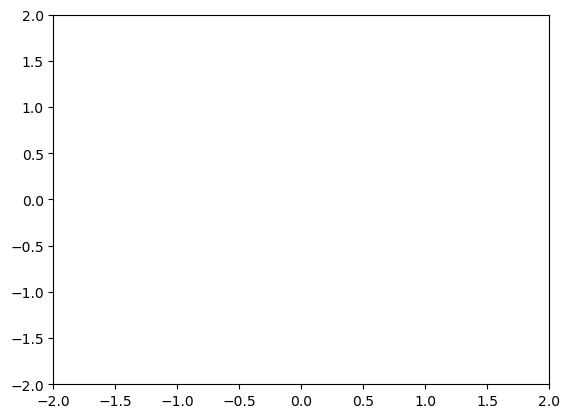

In [64]:
l=1
def animate_double_pendulum(th1,th2,l,dt):
    x1=l*np.sin(th1)
    y1=-l*np.cos(th1)
    x2=x1+l*np.sin(th2)
    y2=y1-l*np.cos(th2)

    fig,ax=plt.subplots()
    ax.set_xlim(-2*l,2*l)
    ax.set_ylim(-2*l,2*l)
    line,=ax.plot([],[],marker="o")

    def init():
        line.set_data([],[])
        return line,

    def update(frame):
        line.set_data([0,x1[frame],x2[frame]],[0,y1[frame],y2[frame]])
        return line,

    ani=FuncAnimation(fig,update,frames=np.arange(0,1000,10),init_func=init,interval=dt*1000,blit=True)
    plt.show()

animate_double_pendulum(th1,th2,l,dt)


from IPython.display import HTML
HTML(ani.to_jshtml())